## Pandas Practice Project: SALES ANALYSIS
In this notebook I will execute basic pandas data science tasks in order to learn a new python library. Tasks include merging .CSV files into one dataset, cleaning dataset for NaN values and duplicates, sorting dataset and adding new columns for analysis, finding which month yeld the highest profit, at what time of day customers order products, and which products are often sold together, plotting these results via matplotlib and drawing conclusions.

Notebook was made on the basis of Keith Galli's youtube tutorial 'Solving real world data science tasks with Python Pandas!'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

1) The dataset is given month by month, each in a seperate .csv file. Since I will perform analysis for the whole year, I wish to combine these files into one .csv, along with removing empty (NaN) rows

In [2]:
df = pd.DataFrame()
all_files = [file for file in os.listdir("./fiscal")]

for file in all_files:
    temp_df = pd.read_csv("./fiscal/" + file)
    df = pd.concat([df, temp_df])

# Remove duplicate description rows
df = df[df["Order Date"] != "Order Date"]

# Find NaN values
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Remove NaN rows
df = df.dropna(how="all")

# Combine data into one .csv
df.to_csv("all_data.csv", index=False)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


2) I wish to find the sales in USD every month. This sounds like a simple task but there is some groundwork to be done since the dataset does not have a column showing sales in USD, and the month the order occured is buried with other currently irrelevant information in the 'order date' column.

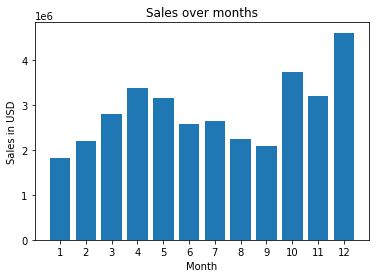

In [4]:
# Columns are in String format
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])

# New sales column
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]

# New month column
df["Month"] = df["Order Date"].str[0:2].astype("int32")
monthly_sales = df.groupby("Month").sum()["Sales"]
months = range(1,13)

plt.bar(months, monthly_sales)
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Sales in USD")
plt.title("Sales over months")
plt.show()

From the figure we can conclude that December had the most sales. Considering this dataset looks at electronics sales it's unsurprising that the peak occurs around Christmas time.

3) Next I want to find the city which is responsible for the most sales.

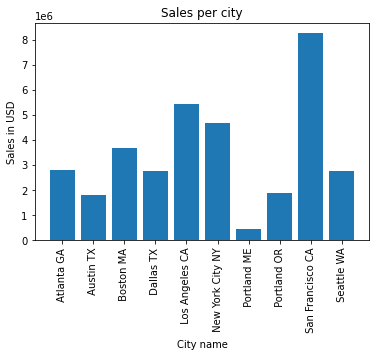

In [5]:
# New city column. Added the state code because of duplicate named cities
df["City"] = df["Purchase Address"].apply(lambda x: x.split(',')[1] + " " + x.split(',')[2].split(' ')[1])

city_sales = df.groupby("City").sum()["Sales"]
cities = [city for city, temp in df.groupby("City")]

plt.bar(cities, city_sales)
plt.xticks(cities, rotation="vertical")
plt.ylabel("Sales in USD")
plt.xlabel("City name")
plt.title("Sales per city")
plt.show()

We conclude that San Francisco is responsible for the most sales. Note that this plot does not account for population size, meaning cities like Portland, Oregon don't perform as well even though they might have a greater sales per capita.

4) Finally I wish to find the time of day most sales occur

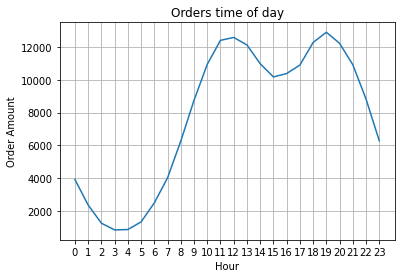

In [7]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Hour"] = df["Order Date"].dt.hour
df["Minute"] = df["Order Date"].dt.minute
df["Count"] = 1

hours = [hour for hour, temp in df.groupby("Hour")]

plt.plot(hours, df.groupby(["Hour"]).count()["Count"])
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Order Amount")
plt.title("Orders time of day")
plt.grid()
plt.show()

Looking at the figure we can identify peaks between 11-13, and between 18-20 with the highest peak at 19.